In [2]:
import pandas as pd
import numpy as np
import os
from datetime import datetime as dt
from matplotlib import pyplot as plt
os.chdir(r"W:\My Documents\Mentee @ Amazon\Forecasting\Project ARIMA")
import statsmodels.api as sm


# Simple Exponential Smoothing- Algerian exports


In [4]:
#reading number of people aged 18 to 49 infected by month
infection_agegrp = pd.read_csv("COVID-19_Infections.csv", parse_dates=['case_month'], index_col=['case_month'])\
    .query('age_group == "18 to 49 years"').rename(columns={'sex':'infections'}).asfreq(pd.infer_freq(infection_agegrp.index))
infection_agegrp.head()


,res_state,age_group,infections
case_month,,,
2020-03-01,TX,18 to 49 years,1426
2020-04-01,TX,18 to 49 years,11353
2020-05-01,TX,18 to 49 years,17813
2020-06-01,TX,18 to 49 years,79797
2020-07-01,TX,18 to 49 years,176188


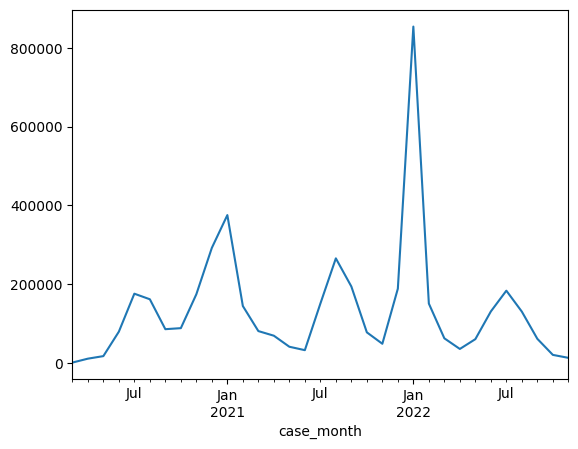

In [18]:
infection_agegrp1 = infection_agegrp.infections
infection_agegrp1.plot();

Train the Model (estimate)

In [22]:
#fit simple exponential smoothing model
# Test train split
len_train = int(infection_agegrp1.size*0.8)
Y_train = infection_agegrp1[:len_train]
Y_test = infection_agegrp1[len_train:]


In [20]:
len_train

26

In [ ]:

Y_train = sm.
infection_agegrp1.copy()

Seasonalityadd = sm.tsa.ExponentialSmoothing(Y, trend='add', seasonal='add').fit()
Seasonalitymul = sm.tsa.ExponentialSmoothing(Y, trend='mul', seasonal= 'mul').fit()
Seasonalityadd_damptrend = sm.tsa.ExponentialSmoothing(Y, trend='add', damped_trend=True, seasonal='add').fit()

# Generate Foreacasts

In [ ]:
#spit out the accuracy metrics
ms = dict(
    SES = sm.tsa.statespace.ExponentialSmoothing(Y).fit(),
    Holt = sm.tsa.statespace.ExponentialSmoothing(Y, trend='add').fit(),
    DampedHolt = sm.tsa.statespace.ExponentialSmoothing(Y, trend='add', damped_trend=True).fit()
)


def RMSE(Y, y):
    """Root-mean-square error."""
    return np.sqrt(np.mean((Y-y)**2))
def MAE(Y, y):
    """Mean absolute error."""
    return np.mean(np.abs(Y-y))
def MAPE(Y, y):
    """Mean absolute percent error."""
    return 100 * np.mean(np.abs((Y-y)/Y))

#Work on it later
# def MASE(Y, y):
#     """TODO"""
#     return np.nan # TODO


def tsaccuracy(Ytest, models):
    """Gather some metrics for a few models."""
    fs = RMSE, MAE, MAPE
    return pd.DataFrame({
        label: [ f(Ytest, model.predict(Ytest.index.min(), Ytest.index.max()))      #Ytest.index min max, done to cover the entire Y
                for f in (RMSE, MAE, MAPE) ]
        for (label, model) in models.items()
    }, index=[f.__name__ for f in fs]).T



In [9]:
model.predict(5)

1965-01-01    24.998618
1966-01-01    22.987612
1967-01-01    25.505772
1968-01-01    23.766284
1969-01-01    23.236675
1970-01-01    23.700321
1971-01-01    22.333501
1972-01-01    19.065922
1973-01-01    20.227879
1974-01-01    24.658391
1975-01-01    36.491478
1976-01-01    34.137952
1977-01-01    33.228158
1978-01-01    31.009796
1979-01-01    26.412860
1980-01-01    30.389601
1981-01-01    33.705786
1982-01-01    34.446025
1983-01-01    31.489008
1984-01-01    28.510129
1985-01-01    26.158643
1986-01-01    23.996446
1987-01-01    14.639848
1988-01-01    14.331334
1989-01-01    15.319367
1990-01-01    18.107359
1991-01-01    22.588713
1992-01-01    28.071746
1993-01-01    25.760537
1994-01-01    22.421007
1995-01-01    22.513146
1996-01-01    25.604915
1997-01-01    29.094660
1998-01-01    30.616054
1999-01-01    23.866132
2000-01-01    27.463748
2001-01-01    39.729589
2002-01-01    37.176411
2003-01-01    35.772397
2004-01-01    37.852062
2005-01-01    39.700562
2006-01-01    46

In [10]:
#forecast data over the same time frame (overlapping)
import scipy.stats as stats     #For Z- scores

#get area under number curve for confidence interval
def errorscale(percent):
    return stats.norm.isf((1 - percent/100) / 2)



# ![display](CI.png)

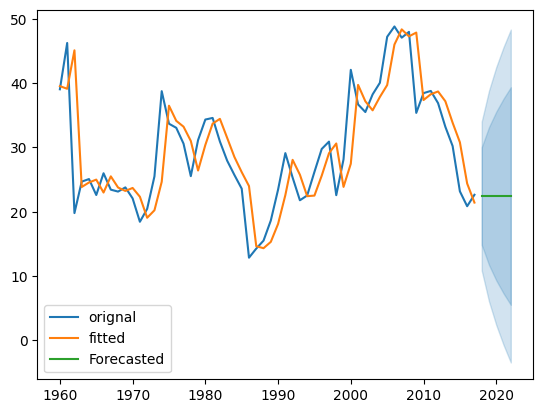

In [11]:

fig, ax = plt.subplots()
ax.plot(algeria_economy.Exports, label = 'orignal')

ax.plot(model.fittedvalues, label= 'fitted')
#forecast for 5 additional years
fcast = model.forecast(5)


#std dev of the training set
sigma = (algeria_economy.Exports - model.fittedvalues).std()

#Add confidence intervel
dy = sigma * np.sqrt(1+np.arange(len(fcast)))
s = errorscale(80)
ax.plot(fcast, label = 'Forecasted')
ax.fill_between(fcast.index, fcast - s*dy, fcast + s*dy, color='C0', alpha=.2)
s = errorscale(95)
ax.fill_between(fcast.index, fcast - s*dy, fcast + s*dy, color='C0', alpha=.2)


plt.legend()
plt.show();



# Find alternate way to calcualte confidence interval (more readable/ interpretable)


Forecasting with treand and seasonality
# ![display](HoltsTrendSeasonality.png)


Holt’s linear trend method with Trend

In [12]:
#Australian population

#setting frequeny of a date time index ( daily/ monthly/ yearly)- inthis case yearly, without it a warning pops up
#No extra column is added as the result of frequency setting

def set_freq(df, freq=None):
    """Set frequency of DateTimeIndex."""
    if freq is None:
        freq = pd.infer_freq(df.index)
    return df.asfreq(freq)


aus_economy = (
    pd.read_csv("global_economy.csv", parse_dates=['Year'])
    .query("Code == 'AUS'").rename(columns={'Year':'Date'})
    .set_index('Date')
    .pipe(set_freq)
)  
aus_economy.head()

,Country,Code,GDP,Growth,CPI,Imports,Exports,Population
Date,,,,,,,,
1960-01-01,Australia,AUS,1.857319e+10,NaN,7.960458,14.061746,12.994452,10276477.0
1961-01-01,Australia,AUS,1.964834e+10,2.485605,8.142560,15.025080,12.403101,10483000.0
1962-01-01,Australia,AUS,1.988801e+10,1.296478,8.116545,12.630927,13.943012,10742000.0
1963-01-01,Australia,AUS,2.150185e+10,6.214278,8.168574,13.834054,13.005886,10950000.0
1964-01-01,Australia,AUS,2.375854e+10,6.978724,8.402706,13.764495,14.938248,11167000.0


<AxesSubplot: xlabel='Date'>

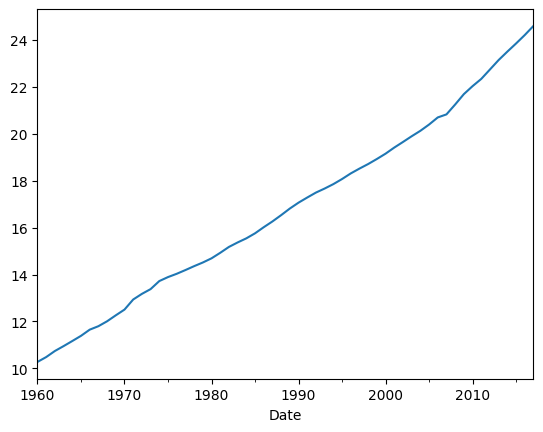

In [13]:
aus_economy.Population = aus_economy.Population/1e6

aus_economy.Population.plot()

In [14]:
#fit the model
fit = sm.tsa.ExponentialSmoothing(aus_economy.Population, trend='add').fit()
fit.summary()

Dep. Variable:,Population,No. Observations:,58
Model:,ExponentialSmoothing,SSE,0.223
Optimized:,True,AIC,-314.493
Trend:,Additive,BIC,-306.251
Seasonal:,None,AICC,-312.846
Seasonal Periods:,None,Date:,"Sat, 14 Jan 2023"
Box-Cox:,False,Time:,09:50:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.3248180,beta,True


# fit summary
### smoothing level of 1 shows it has a perfect trend (as seen in plot above)
### smoothing trend(beta) of 0.324 says that the trend changes often even if the change in miniscule

#create a fit summary with all the alpha_t and and beta_t values 

In [15]:
def summarize_holt(res):
    d = pd.DataFrame(dict(
        observation=res.data.orig_endog,
        level=res.level,
        # slope=res.slope,
        season=res.season,
        forecast=res.fittedvalues))
    return d

summarize_holt(fit)

,observation,level,season,forecast
Date,,,,
1960-01-01,10.276477,10.276477,0.0,10.276487
1961-01-01,10.483000,10.483000,0.0,10.500205
1962-01-01,10.742000,10.742000,0.0,10.701139
1963-01-01,10.950000,10.950000,0.0,10.973412
1964-01-01,11.167000,11.167000,0.0,11.173807
1965-01-01,11.388000,11.388000,0.0,11.388596
1966-01-01,11.651000,11.651000,0.0,11.609402
1967-01-01,11.799000,11.799000,0.0,11.885914
1968-01-01,12.009000,12.009000,0.0,12.005683


In [16]:
print(fit.__dict__)

{'_results': <statsmodels.tsa.holtwinters.results.HoltWintersResults object at 0x0000024372987010>, '__doc__': "\n    Results from fitting Exponential Smoothing models.\n\n    Parameters\n    ----------\n    model : ExponentialSmoothing instance\n        The fitted model instance.\n    params : dict\n        All the parameters for the Exponential Smoothing model.\n    sse : float\n        The sum of squared errors.\n    aic : float\n        The Akaike information criterion.\n    aicc : float\n        AIC with a correction for finite sample sizes.\n    bic : float\n        The Bayesian information criterion.\n    optimized : bool\n        Flag indicating whether the model parameters were optimized to fit\n        the data.\n    level : ndarray\n        An array of the levels values that make up the fitted values.\n    trend : ndarray\n        An array of the trend values that make up the fitted values.\n    season : ndarray\n        An array of the seasonal values that make up the fitte

In [17]:
#show above summary for first five years and five years

summarize_holt(fit).iloc[np.r_[:5, -5:0]]


,observation,level,season,forecast
Date,,,,
1960-01-01,10.276477,10.276477,0.0,10.276487
1961-01-01,10.483000,10.483000,0.0,10.500205
1962-01-01,10.742000,10.742000,0.0,10.701139
1963-01-01,10.950000,10.950000,0.0,10.973412
1964-01-01,11.167000,11.167000,0.0,11.173807
2013-01-01,23.145901,23.145901,0.0,23.094801
2014-01-01,23.504138,23.504138,0.0,23.514825
2015-01-01,23.850784,23.850784,0.0,23.869591
2016-01-01,24.210809,24.210809,0.0,24.210128


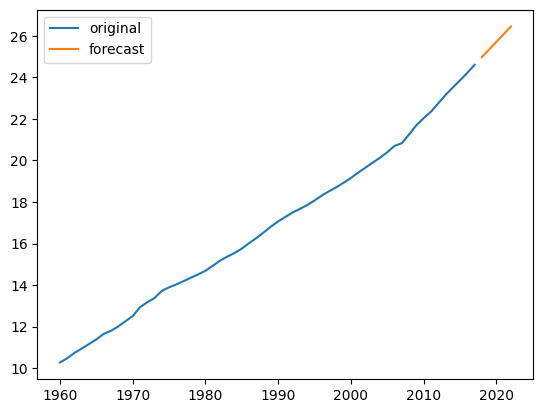

In [18]:
#Sandwich the forecast and actuals
fcast = fit.forecast(5)
fig, ax = plt.subplots()
ax.plot(aus_economy.Population, label= 'original')
ax.plot(fcast, label = 'forecast')
plt.legend()

Holt’s linear trend method and the damped trend method

In [19]:
#fit the model
fit_damped = sm.tsa.ExponentialSmoothing(aus_economy.Population, trend='add', damped_trend=True).fit(damping_trend = 0.9)
fit_damped.summary()

Dep. Variable:,Population,No. Observations:,58
Model:,ExponentialSmoothing,SSE,0.316
Optimized:,True,AIC,-292.371
Trend:,Additive,BIC,-282.068
Seasonal:,None,AICC,-290.131
Seasonal Periods:,None,Date:,"Sat, 14 Jan 2023"
Box-Cox:,False,Time:,09:50:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8984060,alpha,True
smoothing_trend,0.8984060,beta,True


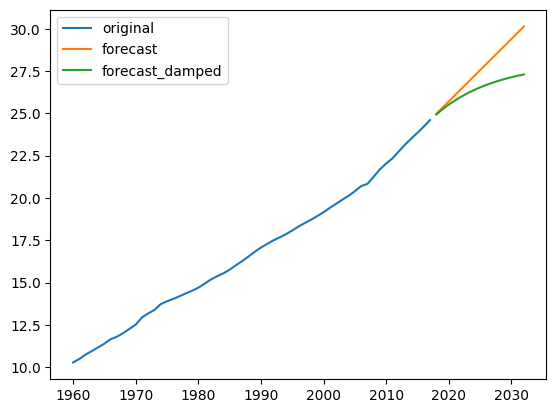

In [20]:
#sandwich damped and non damped

#Sandwich the forecast and actuals
fcast = fit.forecast(15)
fcast_damped = fit_damped.forecast(15)
fig, ax = plt.subplots()
ax.plot(aus_economy.Population, label= 'original')
ax.plot(fcast, label = 'forecast')
ax.plot(fcast_damped, label = 'forecast_damped')
plt.legend()


Dampening seemt to soften the ascent in the trend for longer term forecasts

# Compare 3 foreacasting techniques and compared accuracy metrics- Algerian economy

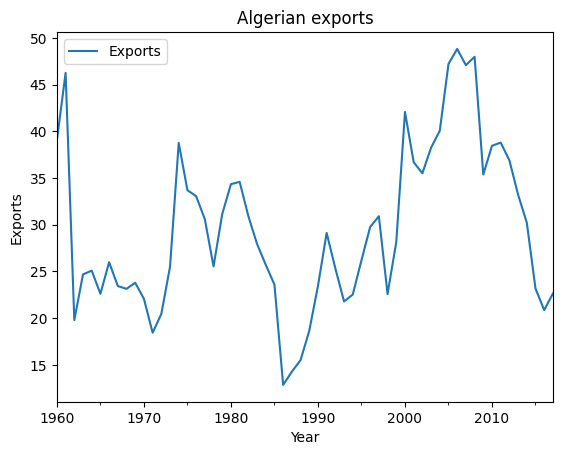

In [21]:
algeria_economy.plot(y='Exports').set_title("Algerian exports")
plt.xlabel('Year')
plt.ylabel('Exports')
plt.show();


In [22]:
#form dictionary of all three model
#setting frequeny of a date time index ( daily/ monthly/ yearly)- inthis case yearly, without it a warning pops up
#No extra column is added as the result of frequency setting

def set_freq(df, freq=None):
    """Set frequency of DateTimeIndex."""
    if freq is None:
        freq = pd.infer_freq(df.index)
    return df.asfreq(freq)

algeria_economy = set_freq(algeria_economy)

Y = algeria_economy.Exports


In [23]:
#spit out the accuracy metrics
ms = dict(
    SES = sm.tsa.statespace.ExponentialSmoothing(Y).fit(),
    Holt = sm.tsa.statespace.ExponentialSmoothing(Y, trend='add').fit(),
    DampedHolt = sm.tsa.statespace.ExponentialSmoothing(Y, trend='add', damped_trend=True).fit()
)


def RMSE(Y, y):
    """Root-mean-square error."""
    return np.sqrt(np.mean((Y-y)**2))
def MAE(Y, y):
    """Mean absolute error."""
    return np.mean(np.abs(Y-y))
def MAPE(Y, y):
    """Mean absolute percent error."""
    return 100 * np.mean(np.abs((Y-y)/Y))

#Work on it later
# def MASE(Y, y):
#     """TODO"""
#     return np.nan # TODO


def tsaccuracy(Ytest, models):
    """Gather some metrics for a few models."""
    fs = RMSE, MAE, MAPE
    return pd.DataFrame({
        label: [ f(Ytest, model.predict(Ytest.index.min(), Ytest.index.max()))      #Ytest.index min max, done to cover the entire Y
                for f in (RMSE, MAE, MAPE) ]
        for (label, model) in models.items()
    }, index=[f.__name__ for f in fs]).T



What is the difference  beetween model.predit and model.forecast?
https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.predict.html#statsmodels.tsa.holtwinters.SimpleExpSmoothing.predict

Model.predict ingests the starting index for prediciton and ending index for prediction


In [24]:
tsaccuracy(Y,ms)

,RMSE,MAE,MAPE
SES,5.865276,4.001150,15.144251
Holt,5.854795,4.004694,15.060433
DampedHolt,5.743077,4.074286,15.208366


Dampedholt has the best RMSE while SES as the best MAE

#Holts winter method with seasonality (additive and multiplicative) included

In [25]:
#Australian summers data
tourism = pd.read_csv("tourism.csv")
tourism.head()

,Quarter,Region,State,Purpose,Trips
0,1998 Q1,Adelaide,South Australia,Business,135.077690
1,1998 Q2,Adelaide,South Australia,Business,109.987316
2,1998 Q3,Adelaide,South Australia,Business,166.034687
3,1998 Q4,Adelaide,South Australia,Business,127.160464
4,1999 Q1,Adelaide,South Australia,Business,137.448533


In [26]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24320 entries, 0 to 24319
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  24320 non-null  object 
 1   Region   24320 non-null  object 
 2   State    24320 non-null  object 
 3   Purpose  24320 non-null  object 
 4   Trips    24320 non-null  float64
dtypes: float64(1), object(4)
memory usage: 950.1+ KB


In [27]:
tourism.Quarter = tourism.Quarter.apply(lambda x: pd.to_datetime(x.replace(' ',''),infer_datetime_format=True))

In [28]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24320 entries, 0 to 24319
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Quarter  24320 non-null  datetime64[ns]
 1   Region   24320 non-null  object        
 2   State    24320 non-null  object        
 3   Purpose  24320 non-null  object        
 4   Trips    24320 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 950.1+ KB


In [29]:
tourism2 = tourism.query('Purpose=="Holiday"')[['Quarter', 'Trips']].groupby(by='Quarter').sum()
tourism2= tourism2.asfreq(pd.infer_freq(tourism2.index))


#   freq = pd.infer_freq(df.index)
#     return df.asfreq(freq)

# algeria_economy = set_freq(algeria_economy)


<AxesSubplot: xlabel='Quarter'>

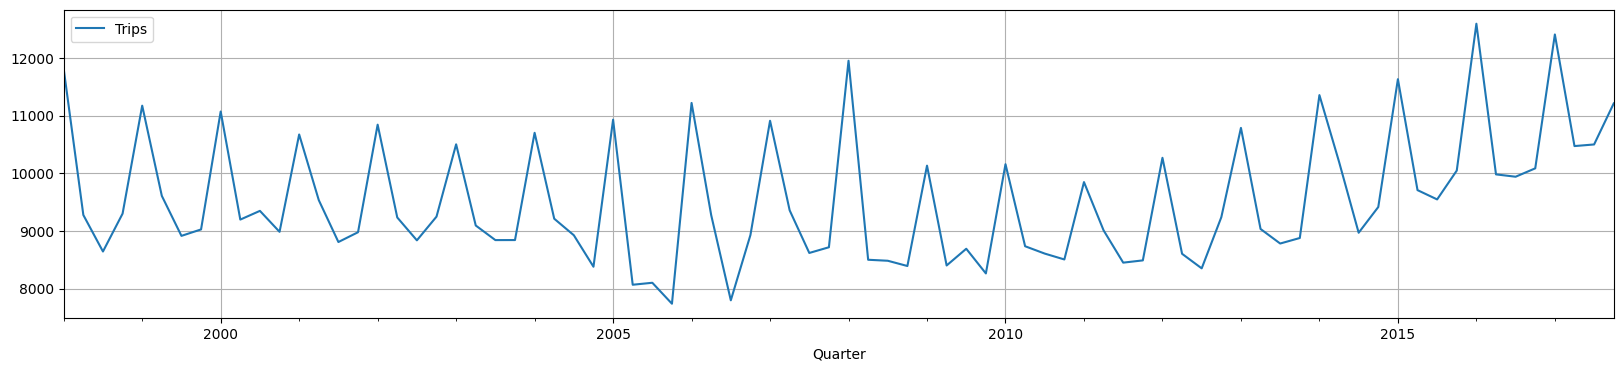

In [30]:
tourism2.plot(grid=True, figsize=[20,4])

In [31]:
#As seen above there is a cleawr spike on every Q1, every yearly date is quarter
#forecast for 5 additional quarters

In [32]:
Y= tourism2.Trips
Holt = sm.tsa.statespace.ExponentialSmoothing(Y, trend='add').fit()
Seasonalityadd = sm.tsa.ExponentialSmoothing(Y, trend='add', seasonal='add').fit()
Seasonalitymul = sm.tsa.ExponentialSmoothing(Y, trend='mul', seasonal= 'mul').fit()

c:\Users\pudasasa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\exponential_smoothing.py:432: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(-unconstrained[i])) * (high - low) + low)
c:\Users\pudasasa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\pudasasa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [33]:
tourism2.head()

,Trips
Quarter,
1998-01-01,11806.037622
1998-04-01,9275.662074
1998-07-01,8642.488590
1998-10-01,9299.523781
1999-01-01,11172.027056


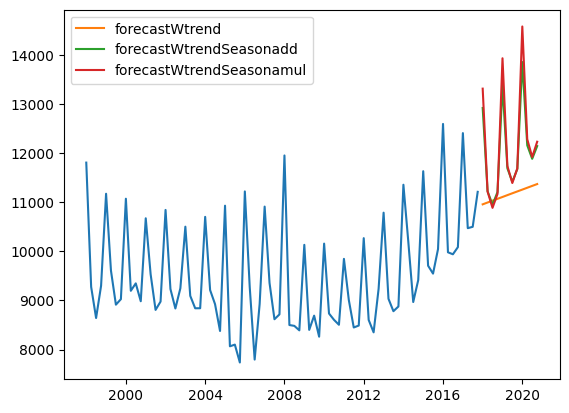

In [34]:
#Forecast 3 years (12 quarters ahead)
ig, ax = plt.subplots()
ax.plot(Y)
ax.plot(Holt.forecast(3*4), label = 'forecastWtrend')
ax.plot(Seasonalityadd.forecast(12), label = 'forecastWtrendSeasonadd')
ax.plot(Seasonalitymul.forecast(12), label = 'forecastWtrendSeasonamul')
plt.legend()

In [35]:
#Print parameters
Seasonalityadd.params_formatted
#seasonality index 's's have to add up to 0
Seasonalitymul.params_formatted
#seasonality index 's's have to add up to 'm', which is 4 (quarterly) in this case
#Custom function written

summarize_holt(Seasonalityadd)

,observation,level,season,forecast
Quarter,,,,
1998-01-01,11806.037622,9838.231036,1515.337337,11181.132907
1998-04-01,9275.662074,9756.185370,-278.498798,9554.677856
1998-07-01,8642.488590,9633.063881,-695.582436,9049.902854
1998-10-01,9299.523781,9649.751784,-516.344722,9070.100188
1999-01-01,11172.027056,9628.151418,1516.601959,11134.359412
...,...,...,...,...
2016-10-01,10084.964670,10711.006038,-506.311437,10250.323528
2017-01-01,12406.418863,10815.407575,1555.087363,12356.804375
2017-04-01,10471.197262,10864.117674,-257.178418,10658.670360


c:\Users\pudasasa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\exponential_smoothing.py:447: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(-unconstrained[i])) * (high - low) + low)


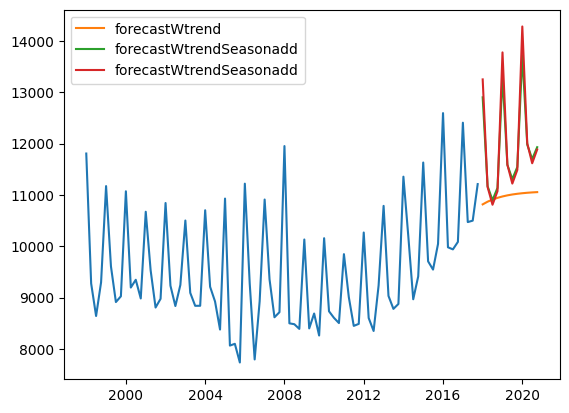

In [36]:
#Dampening is possible in each of the addiditive and multiplicative cases
#Forecast 3 years (12 quarters ahead)
Y= tourism2.Trips
Holt = sm.tsa.statespace.ExponentialSmoothing(Y, trend='add', damped_trend=True).fit()
Seasonalityadd = sm.tsa.ExponentialSmoothing(Y, trend='add', seasonal='add', damped_trend=True).fit()
Seasonalitymul = sm.tsa.ExponentialSmoothing(Y, trend='add', seasonal= 'mul', damped_trend=True).fit()


fig, ax = plt.subplots()
ax.plot(Y)
ax.plot(Holt.forecast(3*4), label = 'forecastWtrend')
ax.plot(Seasonalityadd.forecast(12), label = 'forecastWtrendSeasonadd')
ax.plot(Seasonalitymul.forecast(12), label = 'forecastWtrendSeasonadd')
plt.legend()


#Forecasting with ETS (Statespace models): Because of the (normally distributed) error component added...this method will predict and interval of the the forecast

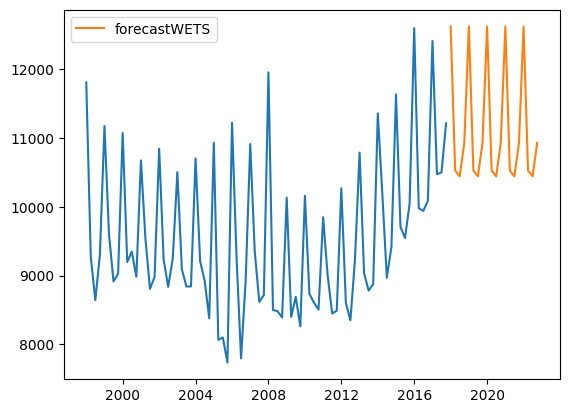

In [40]:
Y= tourism2.Trips

#MNA: Multipllicative error, no Trend, Additive Seasonal component
ets_MNA = sm.tsa.ETSModel(Y,error = 'mul', #M
 trend=None, #N
  seasonal = 'add', #A
   seasonal_periods= 4 ).fit()



fig, ax = plt.subplots()
ax.plot(Y)
ax.plot(ets_MNA.forecast(20), label = 'forecastWETS')
plt.legend()

In [41]:
print(ets_MNA.summary())

                                 ETS Results                                  
Dep. Variable:                  Trips   No. Observations:                   80
Model:                       ETS(MNA)   Log Likelihood                -625.879
Date:                Sat, 14 Jan 2023   AIC                           1267.758
Time:                        09:56:01   BIC                           1286.814
Sample:                    01-01-1998   HQIC                          1275.398
                         - 10-01-2017   Scale                            0.004
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.1055      0.040      2.654      0.008       0.028       0.183
smoothing_seasonal     0.6200        nan        nan        nan         nan         nan
initial_level       

array([<AxesSubplot: xlabel='Quarter'>, <AxesSubplot: xlabel='Quarter'>,
       <AxesSubplot: xlabel='Quarter'>, <AxesSubplot: xlabel='Quarter'>,
       <AxesSubplot: xlabel='Quarter'>], dtype=object)

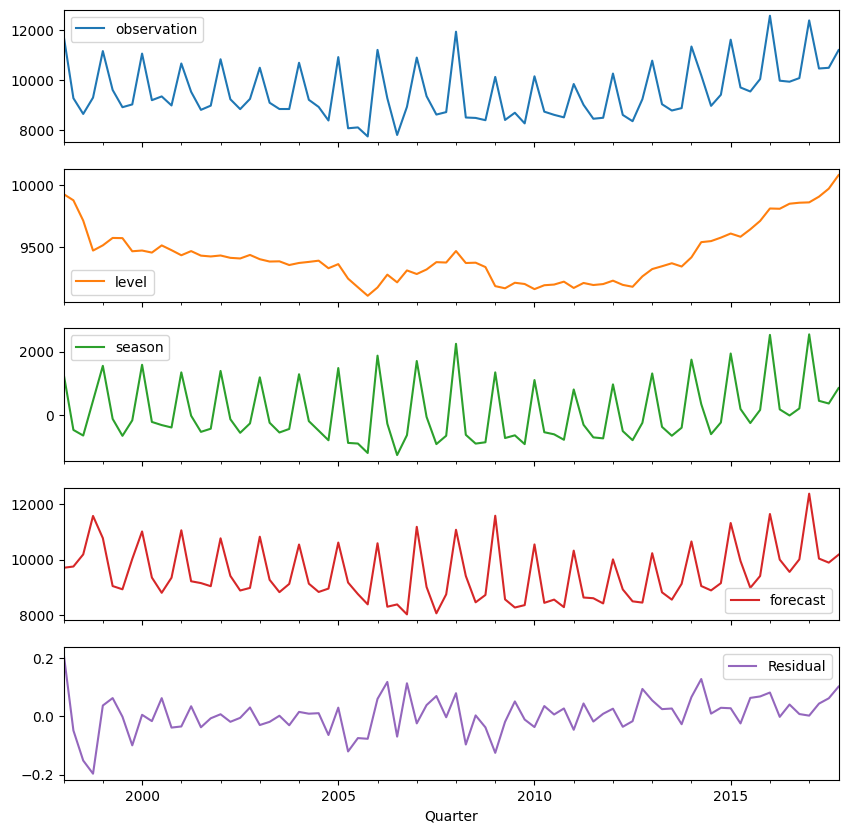

In [42]:
#concat the residuals with the components

B= summarize_holt(ets_MNA)
A= pd.DataFrame(ets_MNA.resid).rename(columns={0:'Residual'})
C= B.join(A)

C.plot(subplots=True, sharex=True,figsize=[10,10])
